### Huoran Yuan Lab 6

Terminal commands:

＃conda install bowtie2
**Align the reads to the human genome**

[5485434@ip-172-30-0-105 ~]$ bowtie2 -p 4 --very-fast --no-unal -x /data/references/hg19/hg19 -U /data/Lab6_data/mixed_reads1.fastq -S aligned1.sam --un unaligned1.fastq

Output:  
1285441 reads; of these:  
  1285441 (100.00%) were unpaired; of these:  
    1030006 (80.13%) aligned 0 times  
    234344 (18.23%) aligned exactly 1 time  
    21091 (1.64%) aligned >1 times  
19.87% overall alignment rate  

**Using Very Sensitive:**  
[5485434@ip-172-30-0-105 ~]$ bowtie2 -p 4 --very-sensitive --no-unal -x /data/references/hg19/hg19 -U  /data/Lab6_data/mixed_reads1.fastq -S aligned1.sam --un unaligned1.fastq  

1285441 reads; of these:  
  1285441 (100.00%) were unpaired; of these:  
    1028342 (80.00%) aligned 0 times  
    232655 (18.10%) aligned exactly 1 time  
    24444 (1.90%) aligned >1 times  
20.00% overall alignment rate  

**What will you use for the database?**
A bowtie2 database (also called an index) containing the human genome at /data/references/hg19/hg19  

**Input reads?**  
Illumina reads. 

**If you use the --un	unaligned.fastq	option,	what will unaligned.fastq contain?**  
The unaligned.fastq file will contain all reads that do not align to the human genome

**What percentage	of your	sequencing library	came from contaminating	human DNA?**  
From the above output, 19.87%(fast) and 20%(sensitive) came from contaminating human DNA.

**Align the reads to the S. oneidensis reference genome:**  

[5485434@ip-172-30-0-105 ~]$ bowtie2 -p 4 --very-fast --no-unal -x /data/references/shewanella_oneidensis_mr-  1/shewanella_oneidensis_mr-1 -U unaligned1.fastq -S shewanella_aligned1.sam --un shewanella_unaligned1.fastq 

Output:
1030006 reads; of these:  
  1030006 (100.00%) were unpaired; of these:
    268017 (26.02%) aligned 0 times  
    710825 (69.01%) aligned exactly 1 time  
    51164 (4.97%) aligned >1 times  
73.98% overall alignment rate  

[5485434@ip-172-30-0-105 ~]$ bowtie2 -p 4 --very-sensitive --no-unal -x /data/references/shewanella_oneidensis_mr-  1/shewanella_oneidensis_mr-1 -U unaligned1.fastq -S shewanella_vsensitive.sam --un   shewanella_vsensitive_unaligned.fastq  
Output:  
1028342 reads; of these:  
  1028342 (100.00%) were unpaired; of these:  
    264850 (25.76%) aligned 0 times  
    711311 (69.17%) aligned exactly 1 time  
    52181 (5.07%) aligned >1 times  
74.24% overall alignment rate  

**If you use the	--un unaligned.fastq option, what will unaligned.fastq contain?**

It will contain the reads that cannot be aligned to neither the human nor S. oneidensis genome.

**What percentage of your filtered library didn’t	align to the reference genome? If you use --verysensitive instead	of --very-fast, does this percentage increase or decrease?**  

100%-73.98%= 26.02% (very fast)  
100%-74.24%= 25.76% (very sensitive)  
So the percentage decreased by 0.26%  

### Generate a coverage plot:

samtools view -b aligned_1.sam > aligned_1.bam  
samtools sort aligned_1.bam > aligned_1.sorted.bam  
samtools index aligned_1.sorted.bam  
samtools depth -a aligned_1.sorted.bam > pileup.tab  


In [5]:
import matplotlib.pyplot as plt
import sys
import csv
import numpy as np
from numpy.random import normal, rand



In [6]:
depths = []
x = []
with open('pileup.tab','r') as oneidensis:
    plots = csv.reader(oneidensis, delimiter='\t')
    for row in plots:
        x.append(int(row[1]))
        depths.append(int(row[2]))        

plt.plot(x, depths,'r.')
plt.title("Position in Genome")  
plt.xlabel("Position in Genome") 
plt.ylabel("Depth")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'pileup.tab'

In [7]:
print(max(depths))
print(min(depths))
print(sum(depths)/len(depths))

ValueError: max() arg is an empty sequence

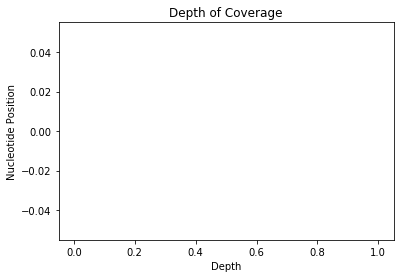

In [8]:
plt.hist(depths, bins= 90)
plt.title("Depth of Coverage")  
plt.xlabel("Depth") 
plt.ylabel("Nucleotide Position")
plt.show()